# Common mode choke

### NGC Specs

- 40x [ferrite cores](https://www.digikey.com/en/products/detail/ferroxcube/U93%2F76%2F30-3C90/7942507?utm_adgroup=Ferrite%20Cores&utm_source=google&utm_medium=cpc&utm_campaign=Shopping_Product_Magnetics%20-%20Transformer%2C%20Inductor%20Components&utm_term=&utm_content=Ferrite%20Cores&gclid=EAIaIQobChMIq-63s7-I_AIVjYrICh37CAviEAQYASABEgLE2vD_BwE)
- 4 turns
- 2 gauge cable
- 2 mH equivalence
- roughly 1500 just for cores...

### Scaled Alternative

- cots 3 phase common mode [choke](https://www.digikey.com/en/products/detail/w%C3%BCrth-elektronik/744839003460/6621988)
- 46 A
- 3 mH
- only $50


### Analysis Results

- not enough power...


In [ ]:
# phase current calculation
voltage = 3.55 * 20
voltage
phase_current = 10000 / (voltage * 3)
phase_current

In [151]:
# file to simulate phase inductance of EA generator
import math
import numpy as np

In [152]:
# gen characteristics
l = .00012  # Inductance. Henries
l += .002
r = .0064   # ohms
# rl = 1.75   # added resistance
rl = 10   # added resistance
fc = r/(2*math.pi*l)    # hz


In [153]:
# speed information
speed = 40  #krpm
freq = speed * 1000 / 60
rad_s = speed * 1000 * 2 * math.pi / 60
t = 1000/freq # period in ms

In [154]:
# voltage
ek = 3.48  # v / krpm
vb = ek*speed   # Vrms
vp = vb * 2**.5 # Vp

In [155]:
xl = l*rad_s    # something ohms
lo = vb/ ((r+rl)**2+xl**2)**.5
phase =math.degrees(math.atan(-xl/(r+rl)))
power=3*lo**2*rl/1000    # power in kW

vterm = lo * rl # vrms
vbus = vterm*6**.5  # vdc
pf = math.cos(math.radians(phase))

In [156]:
# creating some figures
induct_a = np.linspace(0,.002, 100)
induct_mh = induct_a*1000
xl_a = induct_a*rad_s
lo_a = vb/ ((r+rl)**2+xl_a**2)**.5
power_a=3*lo_a**2*rl/1000    # power in kW
power_a_s = power_a*4

# calculating pf
y = np.array([2, 4, 6, 8])
x = np.array(list(map(np.int_, y)))

phase_a = [math.degrees(math.atan(-x/(r+rl))) for x in xl_a]
pf_a = [math.cos(math.radians(pa)) for pa in phase_a]

pf_d = np.absolute(np.array(pf_a)-.919)
pf_id = pf_d.argmin()



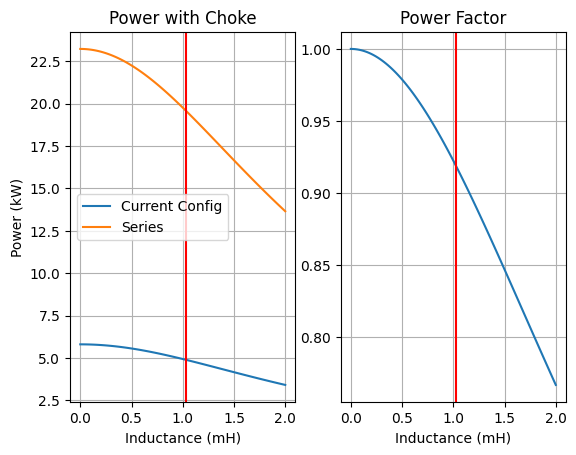

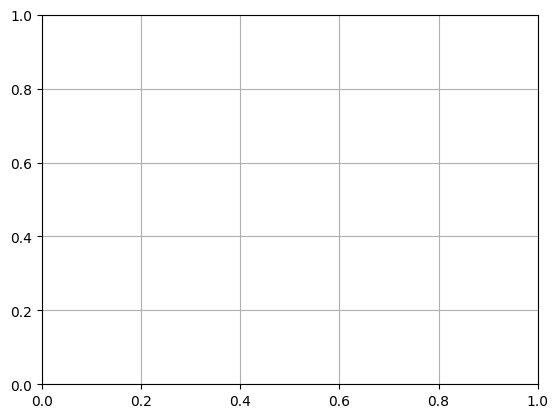

In [157]:
# plotting values...
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
axs[0].plot(induct_mh, power_a)
axs[0].plot(induct_mh, power_a_s)
axs[0].axvline(x = induct_mh[pf_id], color = 'r')
axs[0].set_title('Power with Choke')
axs[0].set_xlabel('Inductance (mH)')
axs[0].set_ylabel('Power (kW)')
axs[0].legend(['Current Config', 'Series'])
axs[0].grid()
plt.grid()

axs[1].plot(induct_mh, pf_a)
axs[1].axvline(x = induct_mh[pf_id], color = 'r')
axs[1].set_title('Power Factor')
axs[1].set_xlabel('Inductance (mH)')


